In [1]:
import iris
from pathlib import Path

In [2]:
from datetime import datetime

In [3]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import string

In [4]:
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

crs_main = ccrs.PlateCarree(central_longitude=180)
crs_aux = ccrs.PlateCarree()

In [5]:
plt.rcParams['mathtext.default'] = 'regular'

In [6]:
def make_plots_with_map(figsize=(20, 15)):
    """
    Make a super plot.
    
    Parameters
    ----------
    figsize: tuple
        Figure size in inches.
    
    Returns
    -------
    fig: matplotlib.figure.Figure
        Parent figure.
    ax_dict: dict
        Dictionary of "vert_prof" axes for vertical profiles;
        and the "map" entry for a cartopy axes in the middle.
    """
    ncol = 10
    nrow = 4

    ax_dict = {}
    ax_dict["vert_prof"] = {}

    fig = plt.figure(figsize=figsize)

    gs = gridspec.GridSpec(nrow, ncol, figure=fig, wspace=0.4, hspace=0.3)

    ax_dict["vert_prof"]["w_canada"] = plt.subplot(gs[0, 1:3]), plt.subplot(gs[0, 3:5])
    ax_dict["vert_prof"]["greenland"] = plt.subplot(gs[0, 5:7]), plt.subplot(gs[0, 7:9])

    ax_dict["vert_prof"]["n_pacific"] = plt.subplot(gs[1, :2]), plt.subplot(gs[1, 2:4])
    ax_dict["vert_prof"]["n_atlantic"] = plt.subplot(gs[1, 6:8]), plt.subplot(gs[1, 8:])
    ax_dict["vert_prof"]["c_pacific"] = plt.subplot(gs[2, :2]), plt.subplot(gs[2, 2:4])
    ax_dict["vert_prof"]["c_atlantic"] = plt.subplot(gs[2, 6:8]), plt.subplot(gs[2, 8:])
    ax_dict["vert_prof"]["s_pacific"] = plt.subplot(gs[3, 1:3]), plt.subplot(gs[3, 3:5])
    ax_dict["vert_prof"]["s_e_atlantic"] = (
        plt.subplot(gs[3, 5:7]),
        plt.subplot(gs[3, 7:9]),
    )

    ax_dict["map"] = plt.subplot(gs[1:3, 4:6], projection=crs_main)
    ax_dict["map"].coastlines()
    ax_dict["map"].set_extent([-200, -5, -90, 90], crs=crs_aux)
    ax_dict["map"].set_xticks([-180, -150, -120, -90, -60, -30], crs=crs_aux)
    ax_dict["map"].set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=crs_aux)
    ax_dict["map"].xaxis.set_major_formatter(lon_formatter)
    ax_dict["map"].yaxis.set_major_formatter(lat_formatter)

    return fig, ax_dict

In [7]:
path_to_prcd = Path.home() / 'UEA' / 'PhD' / 'models' / 'ukca' / 'processed' / 'vertical_profiles'

In [8]:
SOURCES = ['atom', 'xojnl', 'xojnh', 'xojni']
REGIONS = [
    (1, "n_pacific"),
    (2, "c_pacific"),
    (3, "s_pacific"),
    (4, "s_e_atlantic"),
    (5, "c_atlantic"),
    (6, "n_atlantic"),
    (7, "greenland"),
    (8, "w_canada"),
    ]
SEASONS = ["1702", "1608"]
SPECIES = {'ch4': {'latex':'$CH_4$', 'ppn':'ppbvC', 'min':1700, 'max':2100},
           'c2h6': {'latex':'$C_2H_6$', 'ppn':'pptvC', 'min':0, 'max':6000}, 
           'c3h8': {'latex':'$C_3H_8$', 'ppn':'pptvC', 'min':0, 'max':1000}, # of scale in West Canada
           'o3': {'latex':'$O_3$', 'ppn':'ppbv', 'min':0, 'max':600},
           'oh': {'latex':'OH', 'ppn':'pptv', 'min':0, 'max':3.5},
           'no': {'latex':'NO', 'ppn':'ppbv', 'min':0, 'max':0.2}, # 0.5
           'meono2': {'latex':'$MeONO_2$', 'ppn':'pptv', 'min':0, 'max':70},
           'etono2': {'latex':'$EtONO_2$', 'ppn':'pptv', 'min':0, 'max':10},
           'nprono2': {'latex':'$nPrONO_2$', 'ppn':'pptv', 'min':0, 'max':1},
           'iprono2': {'latex':'$iPrONO_2$', 'ppn':'pptv', 'min':0, 'max':10}}

In [9]:
vrbls = {}
for src in SOURCES:
    vrbls[src] = {}
    for ir, reg in REGIONS:
        vrbls[src][reg] = {}
        for season in SEASONS:  # "1702"]:
            vrbls[src][reg][season] = {}
            for sp in SPECIES.keys():
                vrbls[src][reg][season][sp] = {}
                for vr in ['mean', 'std_dev']:
                    vrbls[src][reg][season][sp][vr] = iris.load_cube(str(path_to_prcd / f'vp_{season}_{src}_r{ir}_{sp}_{vr}.nc'))

In [10]:
the_species = 'meono2'

In [11]:
# grey and black for atom

In [12]:
KWARGS = {'atom' : dict(color='k', fmt='-o', linewidth=2, markersize=5, elinewidth=2, capsize=3, label='ATom'),
          'xojnl': dict(color='C2', fmt='--o', linewidth=2, markersize=5, elinewidth=2, capsize=3, label='FULL'),
          'xojnh': dict(color='C6', fmt='--o', linewidth=2, markersize=5, elinewidth=2, capsize=3, label='CHEM'),
          'xojni': dict(color='C0', fmt='--o', linewidth=2, markersize=5, elinewidth=2, capsize=3, label='MARI')}#,
#           'xojnc': dict(color='C3', fmt='--o', linewidth=2, markersize=5, elinewidth=2, capsize=3, label='FIRE'),
#           'xojng': dict(color='C7', fmt='--o', linewidth=2, markersize=5, elinewidth=2, capsize=3, label='BASE')}

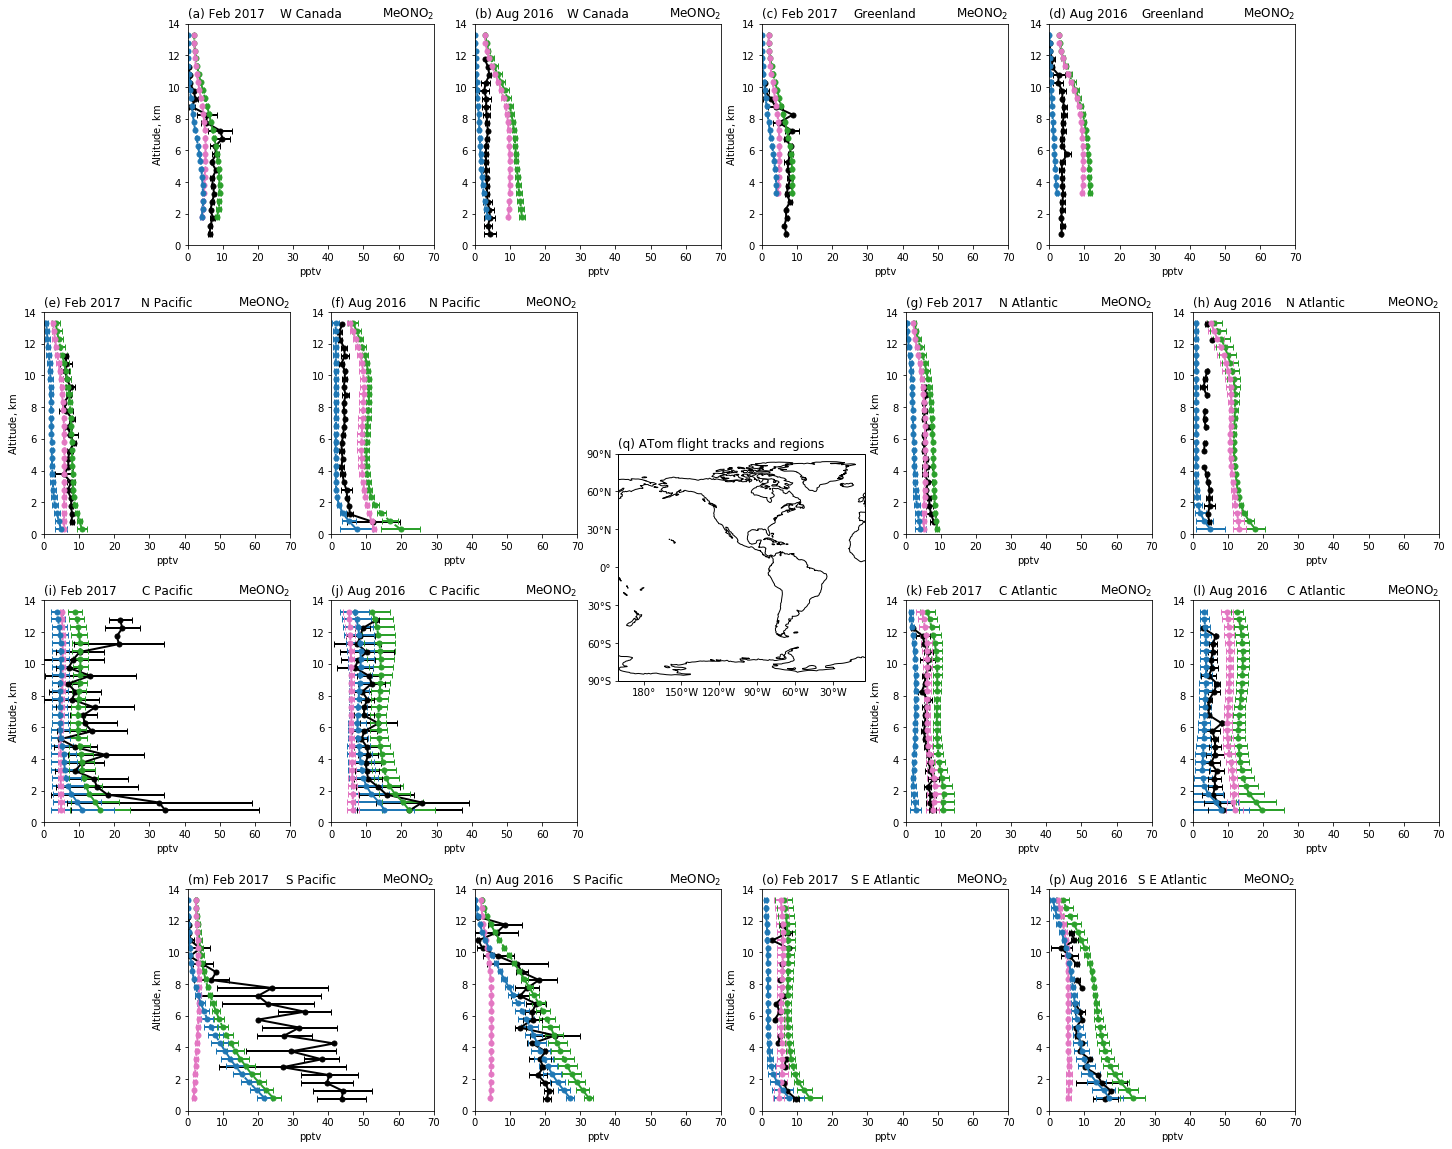

In [13]:
fig, ax_dict = make_plots_with_map(figsize=(25, 20))

ilabels = iter(string.ascii_lowercase)
for reg, ax_pair in ax_dict["vert_prof"].items():
    for i, (season, ax) in enumerate(zip(SEASONS, ax_pair)):
        for src in SOURCES:
            cubes = vrbls[src][reg][season][the_species]
            y = cubes['mean'].coord('altitude').points * 1e-3
            x = cubes['mean'].data
            xerr = cubes['std_dev'].data.squeeze()
            ax.errorbar(x, y, xerr=xerr, **KWARGS[src])
        
        season_name = datetime.strptime(season, '%y%m').strftime('%b %Y')
        ax.set_title(f"({next(ilabels)}) {season_name}", loc="left")
        ax.set_title(SPECIES[the_species]['latex'], loc="right")
        ax.set_title(reg.replace("_", " ").title(), loc="center")
        
        ax.set_xlim([SPECIES[the_species]['min'], SPECIES[the_species]['max']])
        ax.set_ylim([0, 14])
        if i == 0:
            # Add y-label only to the left plot
            ax.set_ylabel('Altitude, $km$')
        ax.set_xlabel(SPECIES[the_species]['ppn'])

ax_dict["map"].set_title(f"({next(ilabels)}) ATom flight tracks and regions", loc="left");